In [3]:
import sqlite3
conn = sqlite3.connect('../sql/producto.db')

c = conn.cursor()
print ('base de datos conectada')

base de datos conectada


In [2]:
conn.row_factory = lambda cursor, row: row[0]
c = conn.cursor()
cantidad = c.execute('select cantidad value from producto').fetchall()

print(cantidad)
c = c.execute("SELECT nombre FROM customer")
lab =c.fetchall()
print(lab)

[3, 4, 3, 5, 7, 6, 4, 7, 5, 10]
['Ana paola Arcos', 'Luis', 'Eduardo ', 'Jose']


In [17]:

can = c.execute('select id  value from customer').fetchall()

for ids in can:
    sent = "select p.cantidad from custom_prod AS cp left join customer as c on c.id = cp.customer_id left join producto as p on cp.product_id = p.id where c.id= ?;"
    c.execute(sent, [ids])
    data = c.fetchall()
    print(data)

[3, 5, 6, 4]
[5, 4, 7, 6]
[3, 4, 4, 5]
[3, 4, 3, 5]


In [79]:
co = c.execute("SELECT nombre FROM customer")
lab =c.fetchall()
nombres =lab
can = c.execute('select id  value from customer').fetchall()
cantidad_producto = {}
i = 0

for ids in can:
    sent = "select p.cantidad from custom_prod AS cp left join customer as c on c.id = cp.customer_id left join producto as p on cp.product_id = p.id where c.id= ?;"
    c.execute(sent, [ids])
    cantidad = c.fetchall()
    cantidad_producto[nombres[i]]=cantidad
    i+=1
    
cantidad_producto

{'Ana paola Arcos': [3, 5, 6, 4],
 'Luis': [5, 4, 7, 6],
 'Eduardo ': [3, 4, 4, 5],
 'Jose': [3, 4, 3, 5]}

In [78]:
nombres[1]

'Luis'

In [74]:
can

[4, 5, 9, 13]

(<Figure size 662.4x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f979c3255f8>)

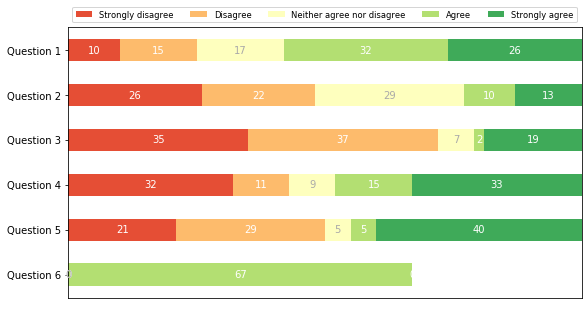

In [6]:
import numpy as np
import matplotlib.pyplot as plt

c.execute("select nombre from producto")
names = c.fetchall()

category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [0,0,0,67,0]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)

In [39]:
conn = sqlite3.connect('../sql/producto.db')
c = conn.cursor()
resutados_cliente_producto = c.execute("""SELECT c.nombre as cliente, p.nombre as producto, p.cantidad 
                      FROM custom_prod AS cp LEFT JOIN  customer as c on  c.id = cp.customer_id 
                      LEFT JOIN producto as p on cp.product_id = p.id""").fetchall()
conn.close()

In [5]:
conn = sqlite3.connect('../sql/producto.db')
c = conn.cursor()
productos = c.execute("SELECT nombre FROM producto").fetchall()
clientes = c.execute("SELECT nombre FROM customer").fetchall()
conn.close()


**Diccionario Mookup:**

```
cliente_producto = { 
    "Paola": {
        "azucar":10,
        "cafe":20
    },
    "Eduardo": {
        "chocolate":21,
        "papas":20
    }

}
```

In [13]:
# Inicalizar el diccionario con los clientes como llaves - None significa Nulo
cliente_producto = {}
for cliente in clientes:
    cliente_producto[cliente[0]] = None

In [14]:
# A todos los clientes asignar todos los productos con cantidad cero (inicialización)
for cliente in cliente_producto.keys():
    cliente_producto[cliente] = dict.fromkeys(lista_todos_productos, 0)

NameError: name 'lista_todos_productos' is not defined

In [15]:
""" 
La tupla clientes, productos, cantidad sigue los indices:
    - tupla[0] es Nombre del cliente
    - tupla[1] es Nombre del producto
    - tupla[2] es la Cantidad
"""
for value in resutados_cliente_producto:
    cliente_producto[value[0]][value[1]] = value[2]
    

NameError: name 'resutados_cliente_producto' is not defined

In [16]:
cliente_producto['Eduardo '].values()

KeyError: 'Eduardo '

In [17]:
cliente_producto['Luis'].values()

AttributeError: 'NoneType' object has no attribute 'values'

In [132]:
cliente_producto.keys()

dict_keys(['Ana paola Arcos', 'Luis', 'Eduardo ', 'Jose'])

In [140]:
cliente_producto['Eduardo ']

4

In [98]:
list(cliente_producto['Ana paola Arcos'].values())

[0, 0, 3, 5, 0, 6, 4, 0, 0, 0]

In [121]:
cliente_producto['Ana paola Arcos'].values()

dict_values([0, 0, 3, 5, 0, 6, 4, 0, 0, 0])

In [10]:
for value in cliente_producto.values():
    print(value.values())



AttributeError: 'NoneType' object has no attribute 'values'

In [163]:
list(cliente_producto.values())


[{'cafe': 0,
  'agua': 0,
  'jugo': 3,
  'arroz': 5,
  'Leche': 0,
  'pan': 6,
  'jabón': 4,
  'Te': 0,
  'chocolate': 0,
  'atun': 0},
 {'cafe': 0,
  'agua': 4,
  'jugo': 0,
  'arroz': 5,
  'Leche': 0,
  'pan': 6,
  'jabón': 0,
  'Te': 7,
  'chocolate': 0,
  'atun': 0},
 {'cafe': 4,
  'agua': 4,
  'jugo': 0,
  'arroz': 0,
  'Leche': 0,
  'pan': 0,
  'jabón': 4,
  'Te': 0,
  'chocolate': 5,
  'atun': 0},
 {'cafe': 4,
  'agua': 4,
  'jugo': 3,
  'arroz': 5,
  'Leche': 0,
  'pan': 0,
  'jabón': 0,
  'Te': 0,
  'chocolate': 0,
  'atun': 0}]

In [124]:
cliente_producto

{'Ana paola Arcos': {'cafe': 0,
  'agua': 0,
  'jugo': 3,
  'arroz': 5,
  'Leche': 0,
  'pan': 6,
  'jabón': 4,
  'Te': 0,
  'chocolate': 0,
  'atun': 0},
 'Luis': {'cafe': 0,
  'agua': 4,
  'jugo': 0,
  'arroz': 5,
  'Leche': 0,
  'pan': 6,
  'jabón': 0,
  'Te': 7,
  'chocolate': 0,
  'atun': 0},
 'Eduardo ': {'cafe': 4,
  'agua': 4,
  'jugo': 0,
  'arroz': 0,
  'Leche': 0,
  'pan': 0,
  'jabón': 4,
  'Te': 0,
  'chocolate': 5,
  'atun': 0},
 'Jose': {'cafe': 4,
  'agua': 4,
  'jugo': 3,
  'arroz': 5,
  'Leche': 0,
  'pan': 0,
  'jabón': 0,
  'Te': 0,
  'chocolate': 0,
  'atun': 0}}

In [181]:
from collections import defaultdict
result = defaultdict(list)


for d in cliente_producto.values():
    for k,v in d.items():
        result[k].append(v)
k = list(result.keys())
v = list(result.values())
print('Diccionario agrupado:', dict(result))
print('Lista de claves:', k)
print('Lista de valores:', v)
        

Diccionario agrupado: {'cafe': [0, 0, 4, 4], 'agua': [0, 4, 4, 4], 'jugo': [3, 0, 0, 3], 'arroz': [5, 5, 0, 5], 'Leche': [0, 0, 0, 0], 'pan': [6, 6, 0, 0], 'jabón': [4, 0, 4, 0], 'Te': [0, 7, 0, 0], 'chocolate': [0, 0, 5, 0], 'atun': [0, 0, 0, 0]}
Lista de claves: ['cafe', 'agua', 'jugo', 'arroz', 'Leche', 'pan', 'jabón', 'Te', 'chocolate', 'atun']
Lista de valores: [[0, 0, 4, 4], [0, 4, 4, 4], [3, 0, 0, 3], [5, 5, 0, 5], [0, 0, 0, 0], [6, 6, 0, 0], [4, 0, 4, 0], [0, 7, 0, 0], [0, 0, 5, 0], [0, 0, 0, 0]]


In [186]:
import numpy as np
import matplotlib.pyplot as plt

c.execute("select nombre from customer")
nombres = c.fetchall()

c.execute("select nombre from producto")
category_names = c.fetchall()

co = c.execute("SELECT nombre FROM customer")
lab = c.fetchall()

nombres = lab

can = c.execute('select id value from customer').fetchall()
co = c.execute("SELECT nombre FROM customer")
lab =c.fetchall()
nombres =lab

conn.row_factory = lambda cursor, row: row[0]
can = c.execute('select id  from customer').fetchall()
cantidad_producto = {}
i = 0

for ids in can:
    sent = """select p.cantidad from custom_prod 
    AS cp left join customer as c on c.id = cp.customer_id 
    left join producto as p on cp.product_id = p.id where c.id= ?;"""
    c.execute(sent, [ids])
    cantidad = c.fetchall()
    cantidad_producto[nombres[i]]=cantidad
    i+=1
    
results = cantidad_producto

def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
     
    plt.savefig("../static/image/productsbarras.png")
    return fig, ax 

survey(results, category_names)

InterfaceError: Error binding parameter 0 - probably unsupported type.

In [233]:


#recorremos nuestro diccionario y vamos agrupando por clave los distintos valores de cada diccionario anidado.
for d in cliente_producto.values():
    print(d)
    for k,v in d.items():
        result[k].append(v)

#Podemos imprimir el diccionario, obtener sus claves         
k = list(result.keys())
v = list(result.values())

      
        

{'cafe': 0, 'agua': 0, 'jugo': 3, 'arroz': 5, 'Leche': 0, 'pan': 6, 'jabón': 4, 'Te': 0, 'chocolate': 0, 'atun': 0}
{'cafe': 0, 'agua': 4, 'jugo': 0, 'arroz': 5, 'Leche': 0, 'pan': 6, 'jabón': 0, 'Te': 7, 'chocolate': 0, 'atun': 0}
{'cafe': 4, 'agua': 4, 'jugo': 0, 'arroz': 0, 'Leche': 0, 'pan': 0, 'jabón': 4, 'Te': 0, 'chocolate': 5, 'atun': 0}
{'cafe': 4, 'agua': 4, 'jugo': 3, 'arroz': 5, 'Leche': 0, 'pan': 0, 'jabón': 0, 'Te': 0, 'chocolate': 0, 'atun': 0}
